# SHAP Library Tools

SHAP library has offers different visualizations. These are discussed here. 
1. Dataset preprocessing, Model Training, Testing, Evaluation Metrics
2. Global Explanation Plots
3. Local Explanation Plots

## 1. Dataset preprocessing, Model Training, Testing, Evaluation Metrics

In [1]:
# Uncomment the libraries not installed
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install scikit-learn
#!pip install xgboost
#!pip install shap

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap
shap.plots.initjs()

In [3]:

drop_list = ['symmetry_worst', 'area_worst', 'symmetry_se','radius_mean','concave points_worst',
            'compactness_se', 'concavity_se','smoothness_se','perimeter_mean','concave points_mean',
            'texture_se','radius_se','smoothness_mean','texture_mean','concave points_se',
            'area_mean','compactness_mean','perimeter_worst','Unnamed: 32', 'id']
#importing our cancer dataset
dataset = pd.read_csv('data.csv')
dataset = dataset.drop(drop_list, axis = 1)
X = dataset.drop(['diagnosis'], axis = 1)
Y = dataset['diagnosis']

In [4]:
#Encoding categorical data values
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [6]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [7]:
classifier = xgb.XGBClassifier()
classifier.fit(X_train_scaled, Y_train)
Y_pred = classifier.predict(X_test_scaled)

In [8]:
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[87  3]
 [ 1 52]]


In [9]:
# set feature names to classifier
classifier.feature_names = list(X.columns.values)

## 2. Global Explanation Plots

### i. Global Feature Importance Plot

Text(0, 0.5, 'features')

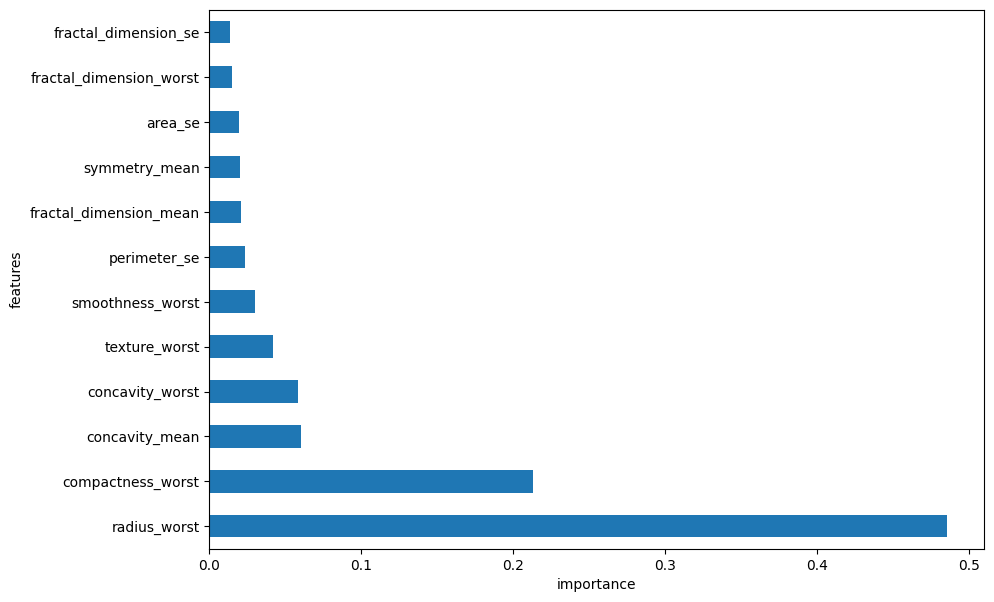

In [10]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feature_importances = pd.Series((classifier.feature_importances_ / sum(classifier.feature_importances_)), index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.xlabel("importance")
plt.ylabel("features")

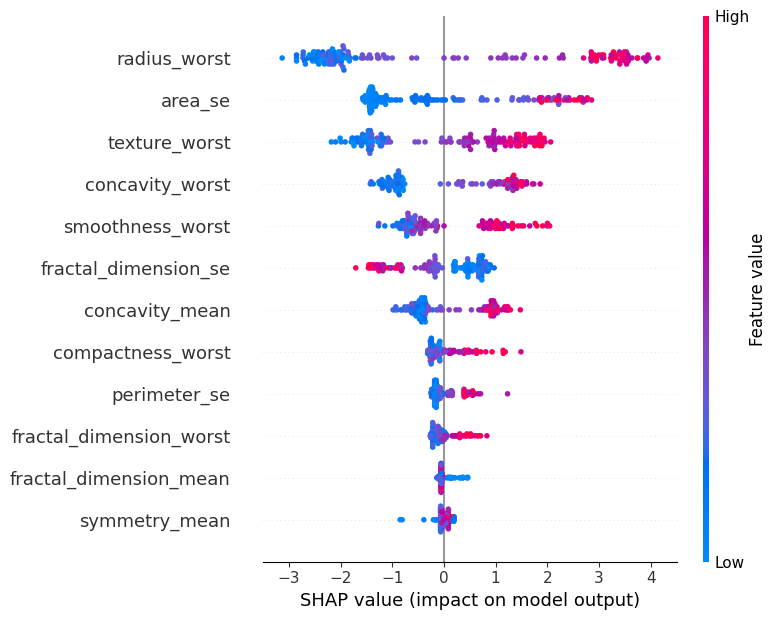

In [11]:
explainer = shap.Explainer(classifier, X_test_scaled)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)

plt.show()


## 3. Local Explanation Plots

### i. Force Plot

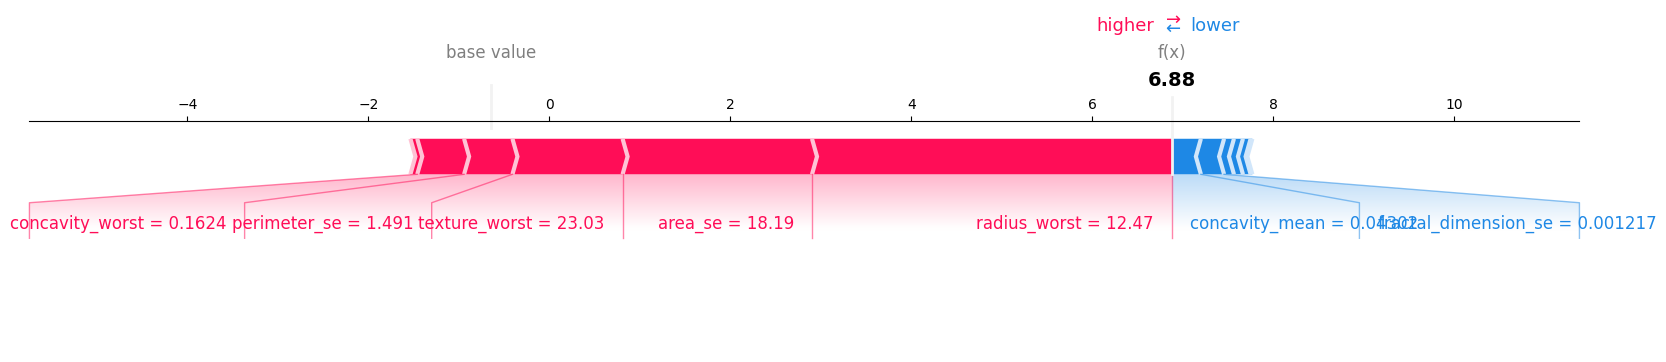

In [12]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = np.array(X_test.iloc[row_to_show]).reshape(1, -1)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(classifier)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction_array)

shap.force_plot(explainer.expected_value, shap_values[0], data_for_prediction, matplotlib=True)


In [13]:
print("model prediction in log-odds space: ", np.log(classifier.predict_proba(data_for_prediction_array)[0][1] / classifier.predict_proba(data_for_prediction_array)[0][0]))

model prediction in log-odds space:  6.882191
